### Réseau de neurones simple (classification des diabètes)

#### Pour un nombre fixe d'époques

[[0.99896415]]  - Correct:  1
[[0.9989634]]  - Correct:  0


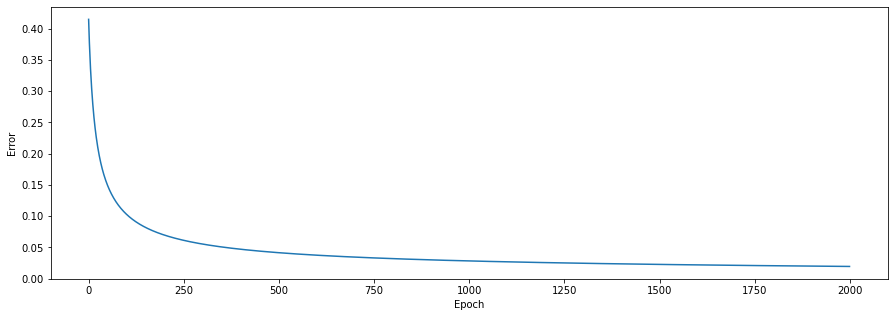

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# input data
inputs = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 0, 0],
                   [1, 1, 0],
                   [1, 1, 1]])

# output data
outputs = np.array([[1], [0], [0], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:
    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    # activation function ==> S(x) = 1/(1 + e^(-x))
    def sigmoid(self, x, deriv=False):
        if deriv:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for a specified number of epochs
    def train(self, epochs=2000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict
example_1 = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples
print(NN.predict(example_1), ' - Correct: ', example_1[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15, 5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

#### Pour un nombre variable d'époches 

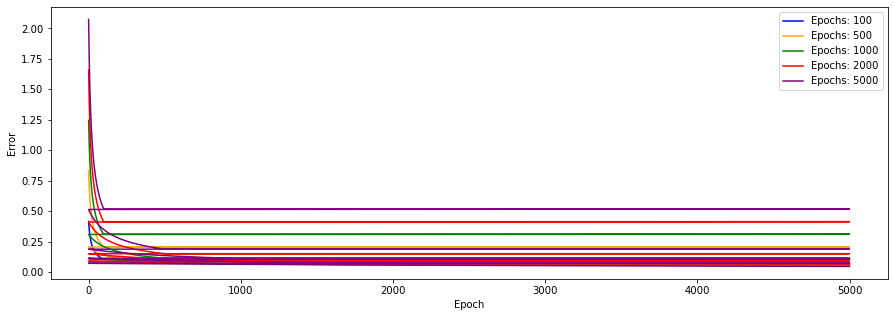

In [2]:
import numpy as np
import matplotlib.pyplot as plt

inputs = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 0, 0],
                   [1, 1, 0],
                   [1, 1, 1]])
outputs = np.array([[1], [0], [0], [1], [1]])
colors = ['blue', 'orange', 'green', 'red', 'purple']

class NeuralNetwork:
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []
    def sigmoid(self, x, deriv=False):
        if deriv:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))
    def backpropagation(self):
        self.error = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)
    def train(self, epochs=2000):
        for epoch in range(epochs):
            self.feed_forward()
            self.backpropagation()
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)
        # Si le nombre d'époques spécifié est inférieur à 5000, remplir le reste de l'erreur avec la dernière valeur
        if epochs < 5000:
            remaining_epochs = 5000 - epochs
            self.error_history.extend([self.error_history[-1]] * remaining_epochs)
            self.epoch_list.extend(range(epochs, 5000))
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction
NN = NeuralNetwork(inputs, outputs)
# Entraîner le réseau avec différentes valeurs d'époques
epoch_values = [100, 500, 1000, 2000, 5000]
plt.figure(figsize=(15, 5))

for i, epochs in enumerate(epoch_values):
    NN.train(epochs)
    # Modifier les valeurs d'erreur légèrement pour les rendre distinctes
    errors = np.array(NN.error_history) * (i + 1)  # Ajuster l'erreur par un facteur i + 1
    plt.plot(NN.epoch_list, errors, label=f'Epochs: {epochs}', color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

### Réseau de neurones multi-couches (MPL) : classification des chiffres manuscrit 

#### script initial

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


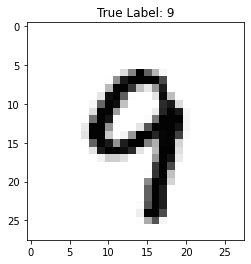

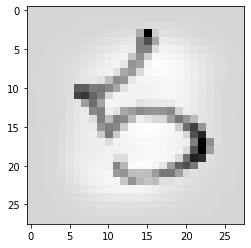

Iteration: 1/500 | Cost 2.36C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\classifier\multilayerperceptron.py:259: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(output) * (y_target), axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\classifier\multilayerperceptron.py:259: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(np.log(output) * (y_target), axis=1)
Iteration: 500/500 | Cost 0.04

Test Accuracy: 97.78%


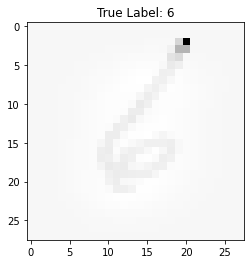

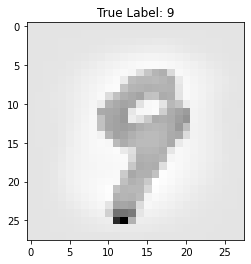

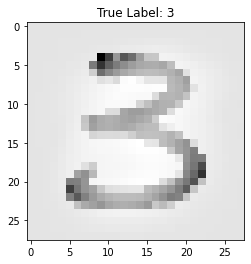

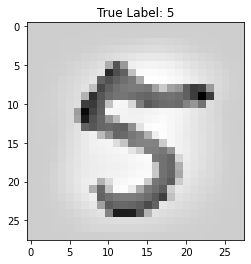

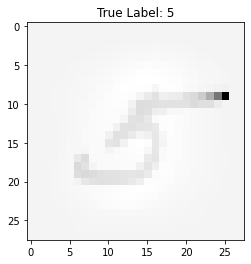

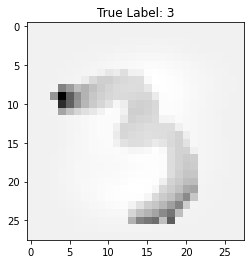

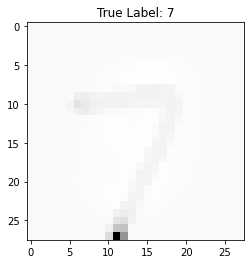

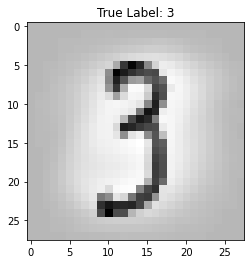

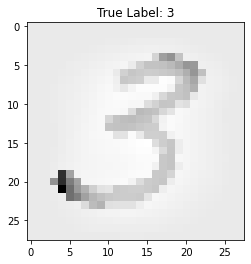

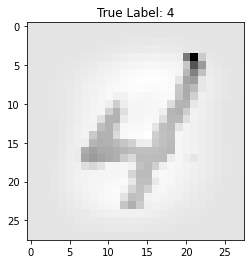

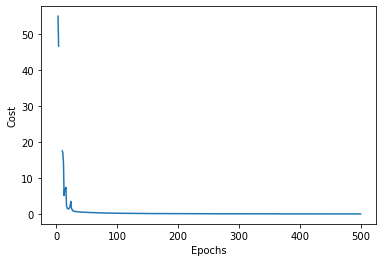

Train Accuracy: 97.92%
Test Accuracy: 97.78%


In [3]:
from mlxtend.data import mnist_data
from keras.utils import to_categorical
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import standardize
from mlxtend.classifier import MultiLayerPerceptron as MLP 

X, y = mnist_data()
# Mélanger les données
X, y = shuffle_arrays_unison((X, y), random_seed=1)
# Split the data into training and test sets
X_train, y_train = X[:5000], y[:5000]
X_test, y_test = X[500:], y[500:]

def plot_digit(X, y, idx):
    img = X[idx].reshape(28, 28)
    plt.imshow(img, cmap='Greys', interpolation='nearest')
    plt.title('True Label: %d' % y[idx])
    plt.show()
    
# Display an example digit
plot_digit(X, y, 3500)
# Standardiser les valeurs des pixels
X_train_std = standardize(X_train)
X_test_std = standardize(X_test)
# Visualiser des exemples des données des données normalisées
plt.imshow(X_train_std[0].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
#Coder les étiquettes One-hot
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
y_train_onehot = y_train_onehot.astype(int)
y_test_onehot = y_test_onehot.astype(int)
# Convertir les étiquettes codées à chaud en nombres entiers
y_train_int = np.argmax(y_train_onehot, axis=1)
# Ajuster le taux d'apprentissage et les époques
nn1 = MLP(eta=0.01, epochs=500, hidden_layers=[50], n_classes=10, minibatches=1, random_seed=None, print_progress=1)
nn1.fit(X_train_std, y_train_int)
#Évaluer la précision du test
test_accuracy = nn1.score(X_test_std, y_test)
print('Test Accuracy: %.2f%%' % (100 * test_accuracy))
# Obtenir des prédictions pour les premiers exemples de test
predictions = nn1.predict(X_test_std[:10])
# Visualisation de la prédiction 
for i in range(10):
    plot_digit(X_test_std, predictions, i)
# Affichage de la courbe de coût sur la durée de l'entraînement
plt.plot(range(len(nn1.cost_)), nn1.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

# Afficher l'exactitude sur les ensembles d'entraînement et de test
print('Train Accuracy: %.2f%%' % (100 * nn1.score(X_train_std, y_train)))
print('Test Accuracy: %.2f%%' % (100 * nn1.score(X_test_std, y_test)))


#### Effet de la variation du paramètre eta

##### script 1

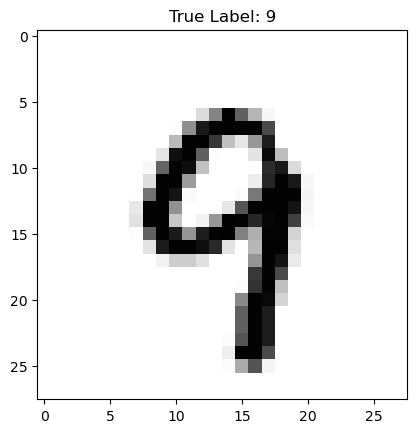

Iteration: 500/500 | Cost 0.279

Test Accuracy: 96.07%


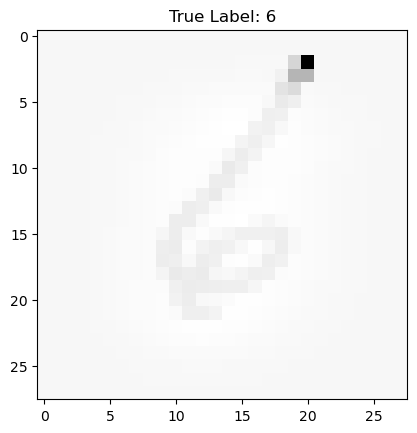

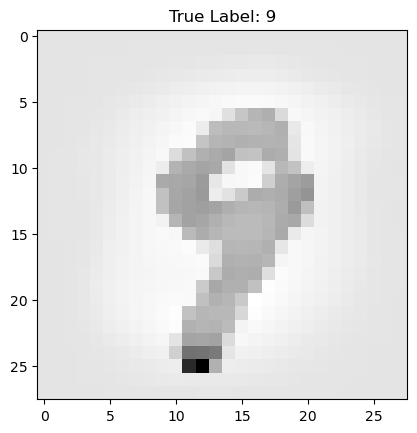

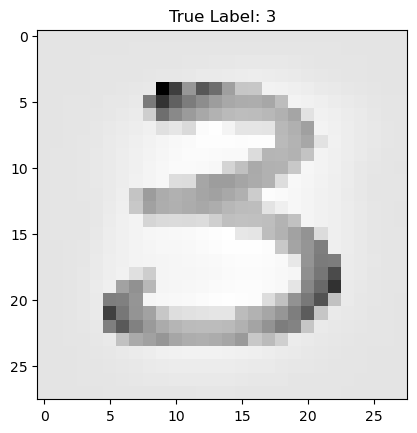

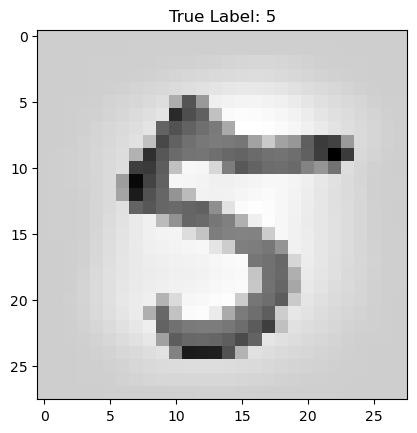

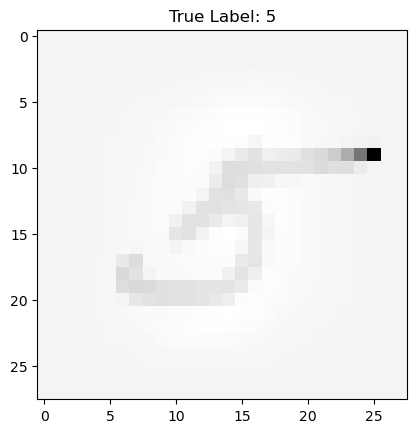

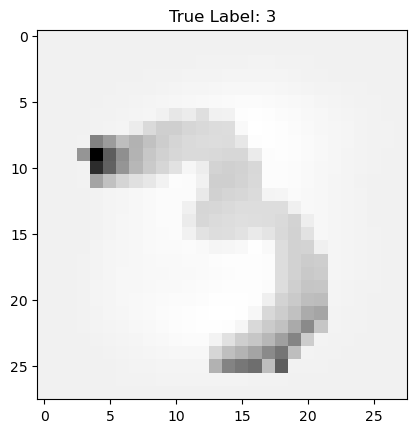

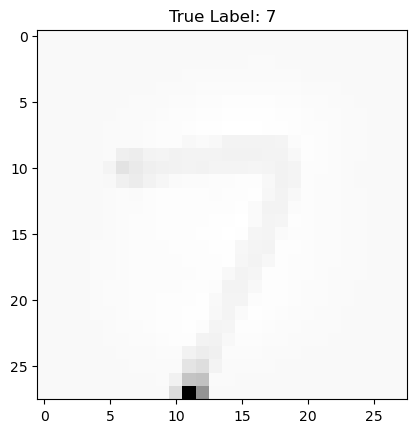

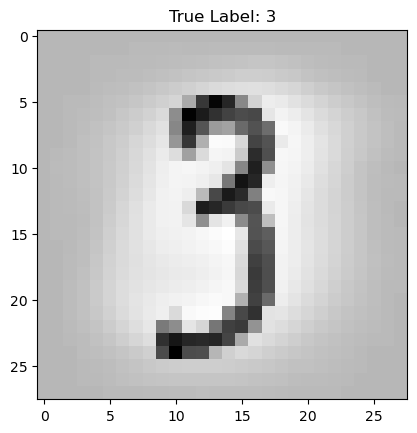

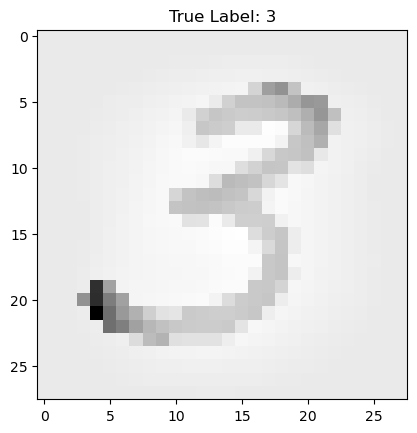

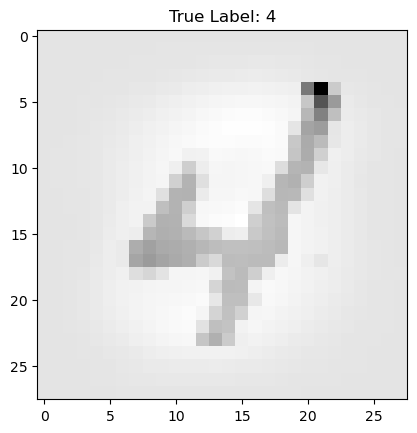

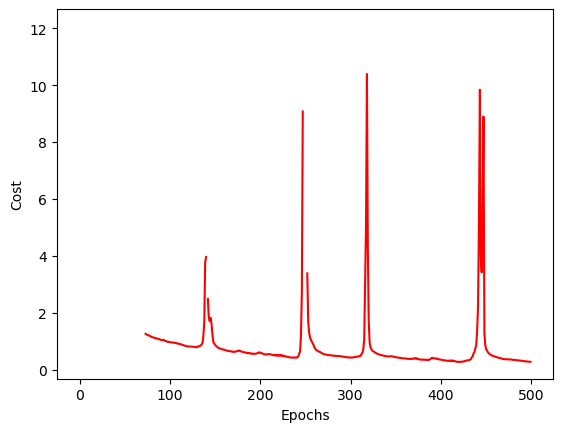

Train Accuracy: 96.28%
Test Accuracy: 96.07%


In [8]:
from mlxtend.data import mnist_data
from keras.utils import to_categorical
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import standardize
from mlxtend.classifier import MultiLayerPerceptron as MLP 

X, y = mnist_data()
# Mélanger les données
X, y = shuffle_arrays_unison((X, y), random_seed=1)
# Split the data into training and test sets
X_train, y_train = X[:5000], y[:5000]
X_test, y_test = X[500:], y[500:]

def plot_digit(X, y, idx):
    img = X[idx].reshape(28, 28)
    plt.imshow(img, cmap='Greys', interpolation='nearest')
    plt.title('True Label: %d' % y[idx])
    plt.show()
# Display an example digit
plot_digit(X, y, 3500)
# Standardiser les valeurs des pixels
X_train_std = standardize(X_train)
X_test_std = standardize(X_test)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
y_train_onehot = y_train_onehot.astype(int)
y_test_onehot = y_test_onehot.astype(int)
# Convertir les étiquettes codées à chaud en nombres entiers
y_train_int = np.argmax(y_train_onehot, axis=1)
#on change lavaleur de eta 
nn1 = MLP(eta=0.03, epochs=500, hidden_layers=[50], n_classes=10, minibatches=1, random_seed=None, print_progress=1)
nn1.fit(X_train_std, y_train_int)
#Évaluer la précision du test
test_accuracy = nn1.score(X_test_std, y_test)
print('Test Accuracy: %.2f%%' % (100 * test_accuracy))
# Obtenir des prédictions pour les premiers exemples de test
predictions = nn1.predict(X_test_std[:10])
# Visualisation de la prédiction 
for i in range(10):
    plot_digit(X_test_std, predictions, i)
# Affichage de la courbe de coût sur la durée de l'entraînement
plt.plot(range(len(nn1.cost_)), nn1.cost_, color = 'red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()
# Afficher l'exactitude sur les ensembles d'entraînement et de test
print('Train Accuracy: %.2f%%' % (100 * nn1.score(X_train_std, y_train)))
print('Test Accuracy: %.2f%%' % (100 * nn1.score(X_test_std, y_test)))

##### Script 2 : Tracer la précision du test et d'entrainement  pour différentes valeurs de eta

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
from mlxtend.data import mnist_data
from keras.utils import to_categorical
from mlxtend.preprocessing import shuffle_arrays_unison
from mlxtend.preprocessing import standardize
from mlxtend.classifier import MultiLayerPerceptron as MLP

X, y = mnist_data()

# Shuffle the data
X, y = shuffle_arrays_unison((X, y), random_seed=1)

# Split the data into training and test sets
X_train, y_train = X[:5000], y[:5000]
X_test, y_test = X[500:], y[500:]

# Define eta values to test
eta_values = [0.001, 0.01, 0.1, 1]

# Initialize empty lists to store accuracy values
train_accuracy_list = []
test_accuracy_list = []

# Train and evaluate the model for each eta value
for eta in eta_values:
    # Train the model
    nn1 = MLP(eta=eta, epochs=500, hidden_layers=[50], n_classes=10, minibatches=1, random_seed=None, print_progress=1)
    nn1.fit(X_train_std, y_train_int)

    # Calculate and store train and test accuracy
    train_accuracy = nn1.score(X_train_std, y_train_int)
    test_accuracy = nn1.score(X_test_std, y_test)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

# Plot the train and test accuracy separately
#fig,
#(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

plot(eta_values, train_accuracy_list, label='Train Accuracy', color='blue')
plot(eta_values, test_accuracy_list, label='Test Accuracy', color='orange')

set_xlabel('Eta')
set_ylabel('Accuracy')
set_title('Train Accuracy')

#ax2.plot(eta_values, test_accuracy_list, label='Test Accuracy', color='orange')
#ax2.set_xlabel('Eta')
#ax2.set_ylabel('Accuracy')
#ax2.set_title('Test Accuracy')

plt.legend()
plt.show()

Iteration: 298/500 | Cost 0.01

#### Effet de la variation du paramètre epoch

Iteration: 500/500 | Cost 0.04

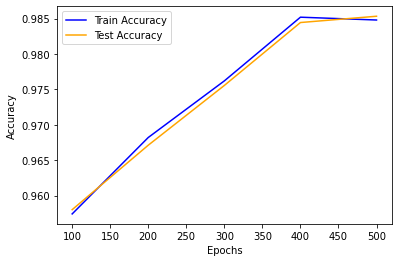

In [6]:
from mlxtend.data import mnist_data
from keras.utils import to_categorical
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import standardize
from mlxtend.classifier import MultiLayerPerceptron as MLP

X, y = mnist_data()
# Mélanger les données
X, y = shuffle_arrays_unison((X, y), random_seed=1)
# Split the data into training and test sets
X_train, y_train = X[:5000], y[:5000]
X_test, y_test = X[500:], y[500:]

# Standardiser les valeurs des pixels
X_train_std = standardize(X_train)
X_test_std = standardize(X_test)

#Coder les étiquettes One-hot
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
y_train_onehot = y_train_onehot.astype(int)
y_test_onehot = y_test_onehot.astype(int)
# Convertir les étiquettes codées à chaud en nombres entiers
y_train_int = np.argmax(y_train_onehot, axis=1)

# Define epoch values to test
epoch_values = [100, 200, 300, 400, 500]

# Initialize empty lists to store accuracy values
train_accuracy_list = []
test_accuracy_list = []

# Train and evaluate the model for each epoch value
for epoch in epoch_values:
    # Train the model
    nn1 = MLP(eta=0.01, epochs=epoch, hidden_layers=[50], n_classes=10, minibatches=1, random_seed=None, print_progress=1)
    nn1.fit(X_train_std, y_train_int)

    # Calculate and store train and test accuracy
    train_accuracy = nn1.score(X_train_std, y_train_int)
    test_accuracy = nn1.score(X_test_std, y_test)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

# Plot the train and test accuracy vs epoch
plt.plot(epoch_values, train_accuracy_list, label='Train Accuracy', color ='blue')
plt.plot(epoch_values, test_accuracy_list, label='Test Accuracy', color ='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()